In [1]:
import sys
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt

print("Python:", sys.version)
print("TensorFlow:", tf.__version__)

Python: 3.11.14 (main, Oct  9 2025, 16:16:55) [Clang 17.0.0 (clang-1700.6.3.2)]
TensorFlow: 2.20.0


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [12]:
vocab_size = 20000   # top 20k words
max_len = 200        # sequence length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=max_len, padding="post", truncating="post")
x_test  = pad_sequences(x_test,  maxlen=max_len, padding="post", truncating="post")

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (25000, 200) (25000,)
Test shape: (25000, 200) (25000,)


In [4]:
def build_simple_rnn(vocab_size=20000, max_len=200, embed_dim=64, rnn_units=64):
    model = models.Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_len),
        layers.SimpleRNN(rnn_units),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

rnn_model = build_simple_rnn(vocab_size, max_len)
rnn_model.summary()

/Users/boatismbair/CST618_Week3_RNN_LSTM/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
epochs = 5
batch_size = 64

rnn_history = rnn_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5035 - loss: 0.6964 - val_accuracy: 0.5066 - val_loss: 0.6941
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5416 - loss: 0.6879 - val_accuracy: 0.5088 - val_loss: 0.6955
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5768 - loss: 0.6706 - val_accuracy: 0.4944 - val_loss: 0.7056
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5912 - loss: 0.6347 - val_accuracy: 0.5120 - val_loss: 0.7186
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6211 - loss: 0.5907 - val_accuracy: 0.5076 - val_loss: 0.7405


In [6]:
def build_lstm(vocab_size=20000, max_len=200, embed_dim=64, lstm_units=64, dropout=0.2):
    model = models.Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_len),
        layers.LSTM(lstm_units, dropout=dropout, recurrent_dropout=0.0),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

lstm_model = build_lstm(vocab_size, max_len)
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
lstm_history = lstm_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5265 - loss: 0.6915 - val_accuracy: 0.5778 - val_loss: 0.6817
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6355 - loss: 0.6446 - val_accuracy: 0.6580 - val_loss: 0.6355
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6502 - loss: 0.6316 - val_accuracy: 0.6230 - val_loss: 0.6644
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6834 - loss: 0.5978 - val_accuracy: 0.7498 - val_loss: 0.5441
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8133 - loss: 0.4328 - val_accuracy: 0.8282 - val_loss: 0.4251


In [8]:
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(x_test, y_test, verbose=0)
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(x_test, y_test, verbose=0)

print(f"SimpleRNN Test Accuracy: {rnn_test_acc:.4f} | Test Loss: {rnn_test_loss:.4f}")
print(f"LSTM     Test Accuracy: {lstm_test_acc:.4f} | Test Loss: {lstm_test_loss:.4f}")

SimpleRNN Test Accuracy: 0.5006 | Test Loss: 0.7490
LSTM     Test Accuracy: 0.8161 | Test Loss: 0.4395


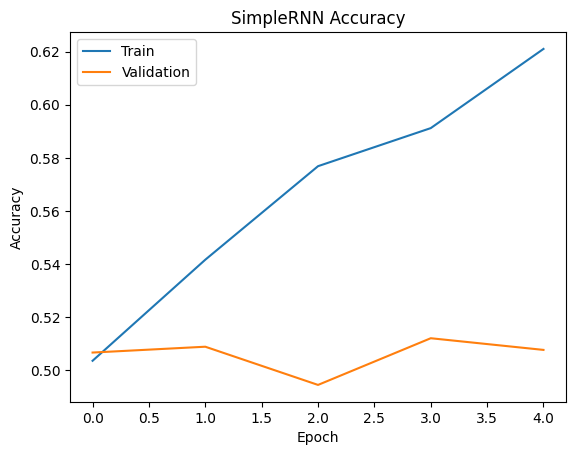

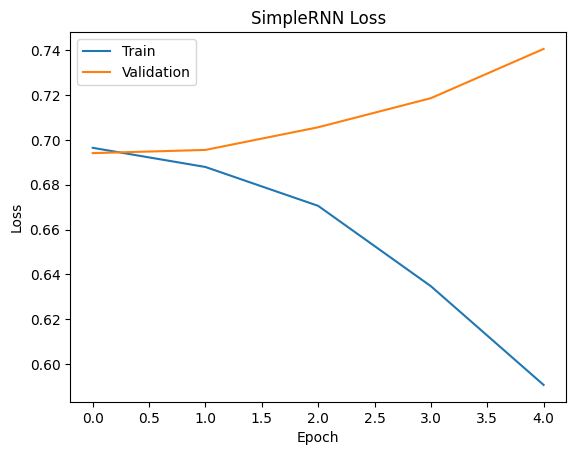

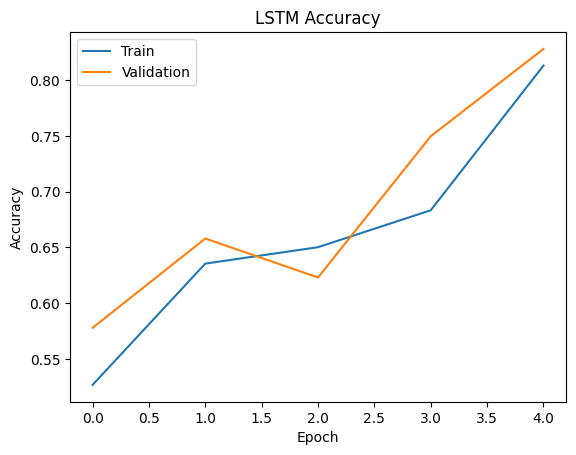

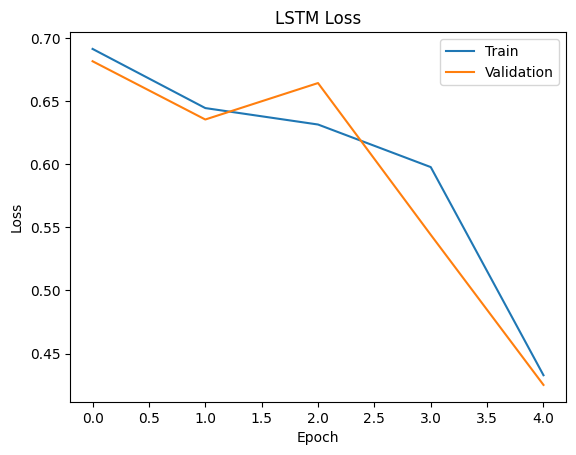

In [9]:
def plot_history(hist, title):
    plt.figure()
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title(f"{title} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Validation"])
    plt.show()

    plt.figure()
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title(f"{title} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train", "Validation"])
    plt.show()

plot_history(rnn_history, "SimpleRNN")
plot_history(lstm_history, "LSTM")

In [ ]:
print("Comparison Summary:")
print(f"- SimpleRNN test accuracy: {rnn_test_acc:.4f}")
print(f"- LSTM     test accuracy: {lstm_test_acc:.4f}")

if lstm_test_acc > rnn_test_acc:
    print("Takeaway: LSTM performed better, likely because gating helps retain longer-term dependencies and stabilizes gradient flow.")
else:
    print("Takeaway: SimpleRNN performed similarly or better here; consider tuning units, embedding dim, epochs, or adding regularization.")

Comparison Summary:
- SimpleRNN test accuracy: 0.5006
- LSTM     test accuracy: 0.8161
Takeaway: LSTM performed better, likely because gating helps retain longer-term dependencies and stabilizes gradient flow.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

rnn_model = Sequential([
    Embedding(input_dim=20000, output_dim=64, input_length=200),
    SimpleRNN(64),
    Dense(1, activation="sigmoid")
])

rnn_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

rnn_model = Sequential([
    Embedding(input_dim=20000, output_dim=64, input_length=200),
    SimpleRNN(64),
    Dense(1, activation="sigmoid")
])

rnn_model.build(input_shape=(None, 200))
rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 64)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,321 (4.91 MB)

 Trainable params: 1,288,321 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

lstm_model = Sequential([
    Embedding(input_dim=20000, output_dim=64, input_length=200),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

lstm_model.build(input_shape=(None, 200))
lstm_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 200, 64)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,089 (5.01 MB)

 Trainable params: 1,313,089 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

### Hyperparameter Tuning Summary

| Hyperparameter     | Baseline Value | Modified Value | Observed Effect |
|--------------------|---------------|----------------|-----------------|
| Sequence Length    | 200           | 300            | LSTM maintained stability; SimpleRNN became less stable |
| Batch Size         | 64            | 32             | Smaller batch improved convergence stability |
| Learning Rate      | Adam default  | Adam + clipping| Gradient clipping stabilized training |
| Gradient Clipping  | None          | clipnorm = 1.0 | Reduced exploding gradients in recurrent layers |